In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
(x_train , y_train) , (x_test , y_test) = fashion_mnist.load_data()

In [7]:
x_train[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_test[:350]
y_test = y_test[:350]

In [10]:
print(y_train[7])
print(y_test[7])

2
6


In [11]:
print(x_train.shape , " , " , x_test.shape)

(1000, 28, 28)  ,  (350, 28, 28)


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
len(class_names)

10

9


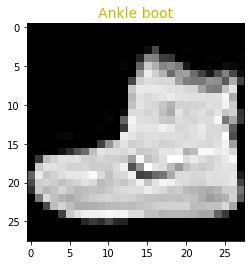

In [14]:
plt.imshow(x_train[0] , cmap='gray')
plt.title(class_names[y_train[0]] , c='y' , size=14)
print(y_train[0])

2


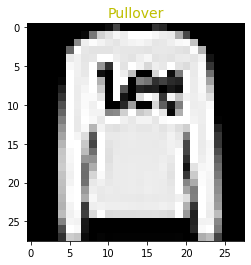

In [15]:
plt.imshow(x_test[1] , cmap='gray')
plt.title(class_names[y_test[1]] , c='y' , size=14)
print(y_test[1])

In [16]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(16 , activation="relu"),
    tf.keras.layers.Dense(8 , activation="relu"),
    tf.keras.layers.Dense(10 , activation='softmax')
])

In [17]:
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']
               )

In [18]:
hist_m_1 = model_1.fit(x_train, y_train,epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 1ms/step - loss: 16.6855 - accuracy: 0.1270
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 2.5630 - accuracy: 0.1230
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 2.2957 - accuracy: 0.1360
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 2.2455 - accuracy: 0.1380
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 2.2294 - accuracy: 0.1380
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 2.2201 - accuracy: 0.1410
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 2.2035 - accuracy: 0.1520
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 2.1969 - accuracy: 0.1530
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 2.2153 - accuracy: 0.1490
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 2.2172 - accuracy: 0.1490
Epoch 11/20
32/32 

In [19]:
model_1.evaluate(x_test,y_test)

11/11 [==============================] - 0s 1ms/step - loss: 2.2312 - accuracy: 0.1371


[2.231173515319824, 0.1371428519487381]

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 12,786
Trainable params: 12,786
Non-trainable params: 0
_________________________________________________________________


In [21]:
import keras

In [22]:
model_conv = tf.keras.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Conv2D(200,kernel_size=(3,3) , activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(100,kernel_size=(3,3) , activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(120 , activation='relu'),
    keras.layers.Dense(64 , activation='relu'),
    keras.layers.Dense(32 , activation='relu'),
    keras.layers.Dense(10 , activation='softmax'),
])

In [23]:
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 200)       2000      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 100)       180100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 100)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2500)              0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [24]:
model_conv.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
                   optimizer = keras.optimizers.Adam(),
                   metrics = ['accuracy'])

In [25]:
hist_model_vonv = model_conv.fit(x_train,y_train,epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 73ms/step - loss: 4.0421 - accuracy: 0.4290
Epoch 2/5
32/32 [==============================] - 2s 69ms/step - loss: 0.7612 - accuracy: 0.7450
Epoch 3/5
32/32 [==============================] - 2s 70ms/step - loss: 0.5572 - accuracy: 0.7980
Epoch 4/5
32/32 [==============================] - 2s 68ms/step - loss: 0.4574 - accuracy: 0.8400
Epoch 5/5
32/32 [==============================] - 2s 68ms/step - loss: 0.3910 - accuracy: 0.8590


In [26]:
model_conv.evaluate(x_test,y_test)

11/11 [==============================] - 0s 23ms/step - loss: 0.7127 - accuracy: 0.7600


[0.7127138376235962, 0.7599999904632568]

In [35]:
x_train.shape

(1000, 28, 28)

In [48]:
from skimage.color import gray2rgb
def resize_images (x_in):
    x_32 = np.zeros((x_in.shape[0] , 32,32,3))
    for i in range (0,x_in.shape[0]):
        x_32[i,2:30,2:30] = gray2rgb(x_in[i,:,:])
    return x_32

In [49]:
type(y_train)

numpy.ndarray

In [50]:
x_train_32 = resize_images(x_train)
x_test_32 = resize_images(x_test)

In [51]:
print(x_train_32.shape)
print(x_test_32.shape)

(1000, 32, 32, 3)
(350, 32, 32, 3)


9


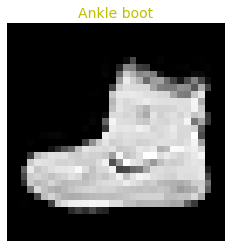

In [55]:
plt.imshow(x_train_32[0].astype(np.uint8) , interpolation="nearest")
plt.title(class_names[y_train[0]] , c='y' , size=14)
plt.axis("off")
print(y_train[0])

In [56]:
from tensorflow.keras.applications import VGG16

In [59]:
model_vgg = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32,32,3))

58889256/58889256 [==============================] - 2290s 39us/step


In [60]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model = keras.Sequential()
for layer in model_vgg.layers[:-1]:
    model.add(layer)

In [ ]:
for layer in model.layer:
    layer.trainable = False

In [ ]:
model.add(keras.layer.Dense(8 , activation='sigmoid'))
model.add(keras.layer.Dense(10,activation='softmax'))